In [25]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as sm

%matplotlib inline


* 3.1 Simple Linear Regression
* 3.3 Multiple Linear Regression and Interpreting Regression Coefficients (15:38)

<img src="images/IFSL.png" alt="drawing" style="width:500px;"/>

* An excellent reference for statistical learning


# Linear Regression


- A simple method to predict a *quantitative* response $Y$ on the basis of a single predictor variable $X$

- Assume an approximately linear relationship between $X$ and $Y$

- Remember that the equation of a line is:

$$
    Y = \beta_o + \beta_1 ~ X
$$




### Advertizing data Datasets

- Displays sales (in thousands of units) for some product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper.
* Which medium or combination of) (if any) contribute to sales?
* How accurately can we estimate the effect of each medium on sales?
* Is there Synergy between the advertising media?
* Etc.



In [27]:
advertising = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
from scipy.stats import linregress

linreg = linregress(advertising["TV"], advertising["sales"])

linregress(advertising["TV"], advertising["sales"])

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703)

### Linear Regression

* `linregress` returns the intercept $\beta_0$ and the slope $\beta_1$ of the linear relationship between sales and advertising budget for TV

$$
    sales \approx \beta_o + \beta_1 ~ TV
$$

* Together, $\beta_0$ and $\beta_1$ are known as the model parameters


In [79]:
some_tv_advertising = 250
some_sales_prediction = linreg.intercept + linreg.slope * some_tv_advertising
print(some_sales_prediction)


18.91675365738263


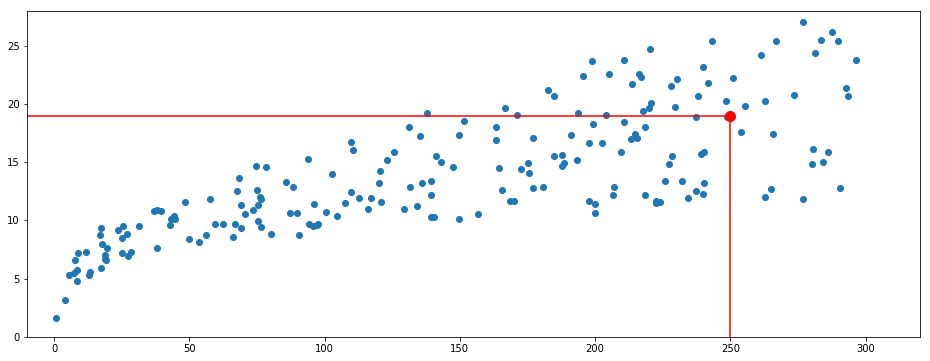

In [80]:
plt.figure(figsize=(16,6))
some_tv_advertising = 250
some_sales_prediction = linreg.intercept + linreg.slope * some_tv_advertising
plt.scatter(advertising["TV"], advertising["sales"])
plt.xlim(-10, 320)
plt.ylim(0, 28)
plt.vlines(some_tv_advertising, 0, some_sales_prediction, color='red')
plt.hlines(some_sales_prediction, -10, some_tv_advertising, color='red')
plt.scatter(some_tv_advertising, some_sales_prediction, s=100, color='red')


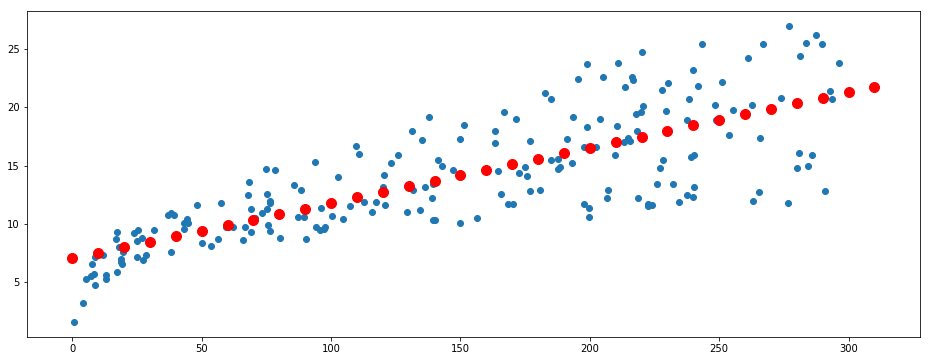

In [81]:
plt.figure(figsize=(16,6))

x_axis = np.arange(0,320, 10)

y_line = linreg.intercept + linreg.slope * x_axis
plt.scatter(advertising["TV"], advertising["sales"])
plt.scatter(x_axis, y_line, color='red', s=100)



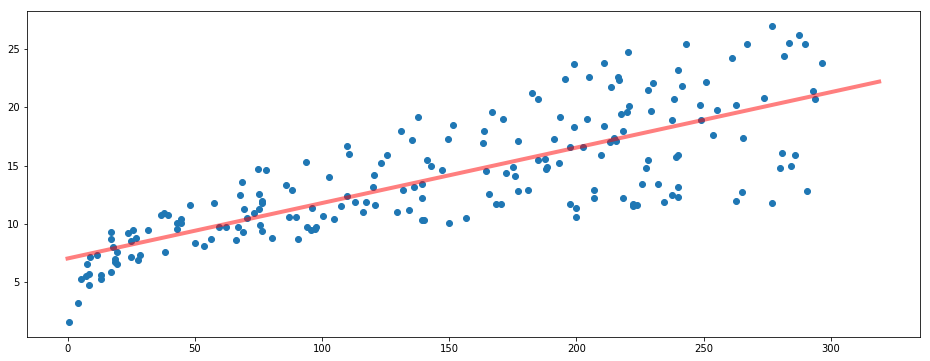

In [82]:
plt.figure(figsize=(16,6))

x_axis = np.arange(0,320)
y_line = linreg.intercept + linreg.slope * x_axis
plt.scatter(advertising["TV"], advertising["sales"])
plt.plot(x_axis, y_line, color='red', linewidth=4, alpha=0.5)

### The Quality of the Regression

```python
>>> linregress(advertising["TV"], advertising["sales"])

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703)
```

*  The correlation coefficient for the relationship between TV and sales is rather high
   * TV advertising budget explains $r^2 = 0.61$ of the variance in the product's sales


* Recall that the error is the differnece between the predicted value and the actual value

* If  $\hat{y}_i = \beta_0 + \beta_1 x_i$, then the error for $i^th$ data point is $e_i = \hat{y}_i - y_i$


In [84]:
some_point = advertising.iloc[0]
some_point

TV           230.1
radio         37.8
newspaper     69.2
sales         22.1
Name: 0, dtype: float64

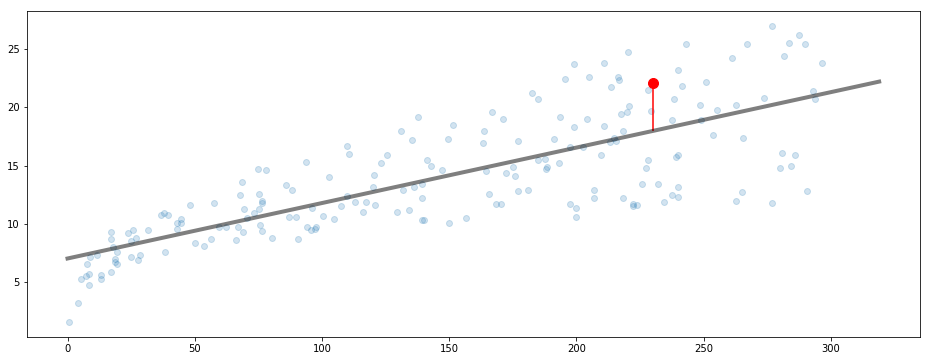

In [93]:
plt.figure(figsize=(16,6))

x_axis = np.arange(0,320)
y_line = linreg.intercept + linreg.slope * x_axis
plt.scatter(advertising["TV"], advertising["sales"], alpha=0.2)
plt.plot(x_axis, y_line, color='black', linewidth=4, alpha=0.5)


y_hat = linreg.intercept + linreg.slope * some_point["TV"]
plt.scatter(some_point["TV"], some_point["sales"], color='red', s=100)
plt.vlines(some_point["TV"], some_point["sales"], y_hat, color='red')


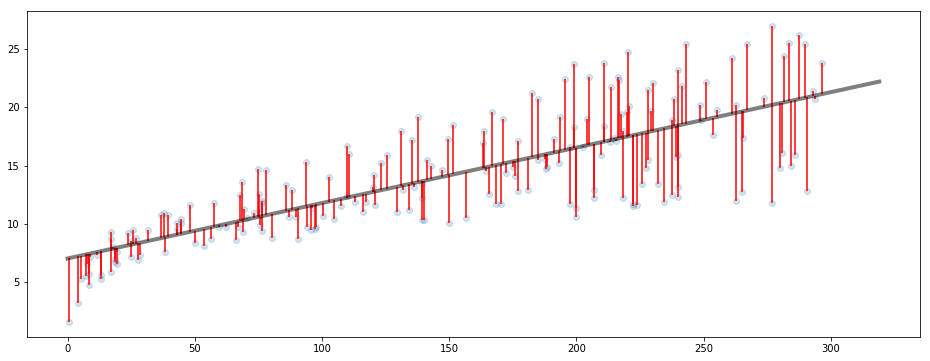

In [94]:
plt.figure(figsize=(16,6))

x_axis = np.arange(0,320)
y_line = linreg.intercept + linreg.slope * x_axis
plt.scatter(advertising["TV"], advertising["sales"], alpha=0.2)
plt.plot(x_axis, y_line, color='black', linewidth=4, alpha=0.5)

for i in range(advertising.shape[0]):
    y_hat = linreg.intercept + linreg.slope * advertising.iloc[i]["TV"]
    #plt.scatter(advertising.iloc[i]["TV"], advertising.iloc[i]["sales"], color='red', s=100)
    plt.vlines(advertising.iloc[i]["TV"], advertising.iloc[i]["sales"], y_hat, color='red')


### The Residual Sum of Squares

* We can quantify how well a line fits the data simply by assessing the total error 
* To avoid that error values cancel out, we compute the square of the error
* We call that the residual sum of squares (RSS)

$$
RSS = e_1^2 + e_2^2 + ... + e_n^2
$$





### Regression coefficients - Minimizing the RSS

* Naturally, we want the model that provides the smallest RSS
  * This not always the case with other modeling techniques
  * A "database" is a "model" which can provide RSS=0, yet, it's a bad model

* The line with the smallest RSS is the best model under the current assumption
  * Model is linear





### Regression coefficients - Minimizing the RSS - Cont'd 

<img src="images/RSS_Examples.png" alt="drawing" style="width:900px;"/>


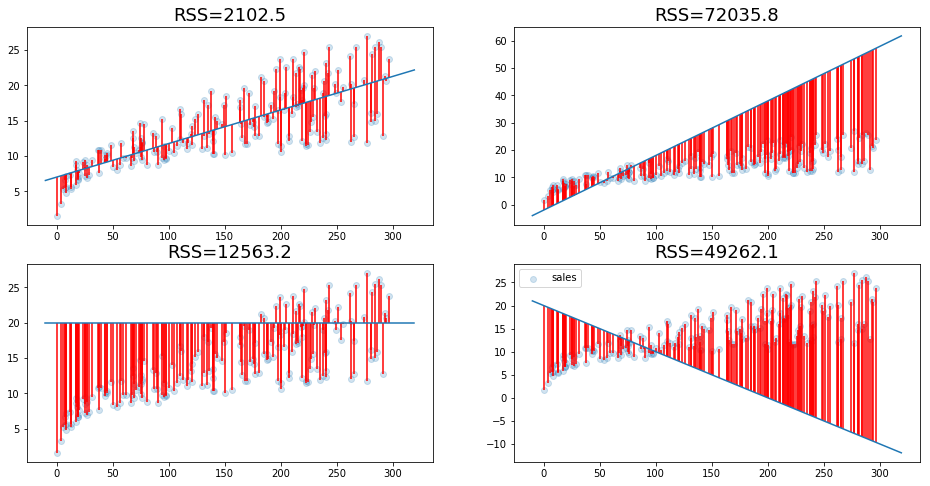

In [130]:
plt.figure(figsize=(16,8))


models = [(linreg.intercept, linreg.slope), (-2,0.2), (20,0), (20,-0.1)]

x_axis = np.arange(-10,320)

for (m, model) in enumerate(models):
    plt.subplot(2, 2, m+1)
    y_line = model[0] + model[1] * x_axis
    plt.scatter(advertising["TV"], advertising["sales"], alpha=0.2)
    RSS = 0 
    for i in range(advertising.shape[0]):
        y_hat = model[0] + model[1]  * advertising.iloc[i]["TV"]
        #plt.scatter(advertising.iloc[i]["TV"], advertising.iloc[i]["sales"], color='red', s=100)
        plt.vlines(advertising.iloc[i]["TV"], advertising.iloc[i]["sales"], y_hat, color='red')    
        RSS += (y_hat - advertising.iloc[i]["sales"])**2
    plt.plot(x_axis, y_line)
    plt.title( "RSS={}".format(round(RSS,1)), fontsize=18)
    
plt.legend()
        

<img src="images/curve.png" alt="drawing" style="width:1000px;"/>

### Computing the RSS

* For linear regression, we can use calculus to the closed form of $\beta_0$ and $\beta_1$ that minimize the RSS

* Minimize equation by finding where partial derivatives are equal to 0 


$
\beta_1 = \frac{\sum_{i=1}^{n} (x_i -\bar{x})(y_i -\bar{y})}{\sum_{i=1}^{n} (x_i -\bar{x})^2}
$


$
\beta_0 = \bar{y} - \beta_1\bar{x}
$


### Question

* Our data are samples from a larger population
* Getting new data may lead to different parameter estimates
* How confident are we in our model estimates?
* How can we quantify our belief in our params?


### Confidence Interval of Model Parameter

* One way we have done this in the past is using bootstrap
  * Subsample with replacement the same number of points
  * Compute the linear regression using the bootstrap sample
  * Computing the 95% confidence interval of the model
    
    


In [135]:
print(advertising.shape)

(200, 4)


In [136]:
advertising.sample(advertising.shape[0], replace=True).head()

,TV,radio,newspaper,sales
54,262.7,28.8,15.9,20.2
182,56.2,5.7,29.7,8.7
7,120.2,19.6,11.6,13.2
192,17.2,4.1,31.6,5.9
80,76.4,26.7,22.3,11.8


In [143]:
advertising.sample(advertising.shape[0], replace=True).head()

,TV,radio,newspaper,sales
62,239.3,15.5,27.3,15.7
98,289.7,42.3,51.2,25.4
69,216.8,43.9,27.2,22.3
100,222.4,4.3,49.8,11.7
99,135.2,41.7,45.9,17.2


In [186]:
np.random.choice([1,2,3], size=3)

array([3, 3, 3])

In [210]:
bootstrap_intercepts = []
bootstrap_slopes = []

for i in range(50000):
    sample_indexes = np.random.choice(advertising.index, size=len(advertising.index))
    bootstrap_sample = advertising.iloc[sample_indexes]
    lr = linregress(bootstrap_sample["TV"], bootstrap_sample["sales"])    
    bootstrap_intercepts.append(round(lr.intercept, 3))
    bootstrap_slopes.append(round(lr.slope,3))

    
bootstrap_intercepts[:10], bootstrap_slopes[:10]

([7.256, 7.291, 7.457, 7.441, 7.327, 6.856, 6.701, 7.155, 6.689, 6.811],
 [0.048, 0.045, 0.045, 0.041, 0.044, 0.051, 0.049, 0.048, 0.051, 0.046])

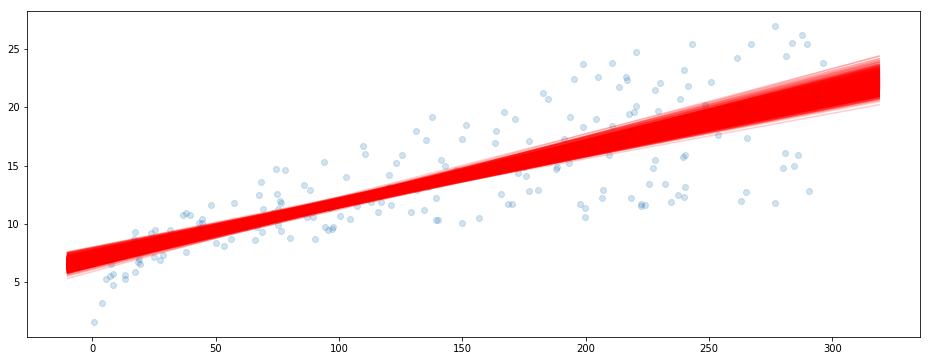

In [211]:
plt.figure(figsize=(16,6))

plt.scatter(advertising["TV"], advertising["sales"], alpha=0.2)

x_axis = np.arange(-10,320)

for i in np.random.choice(range(5000), 1000, replace=False):
    y_hat = bootstrap_intercepts[i] + bootstrap_slopes[i] * x_axis
    plt.plot(x_axis, y_hat, color='red', alpha=0.2)

[6.393 7.707]


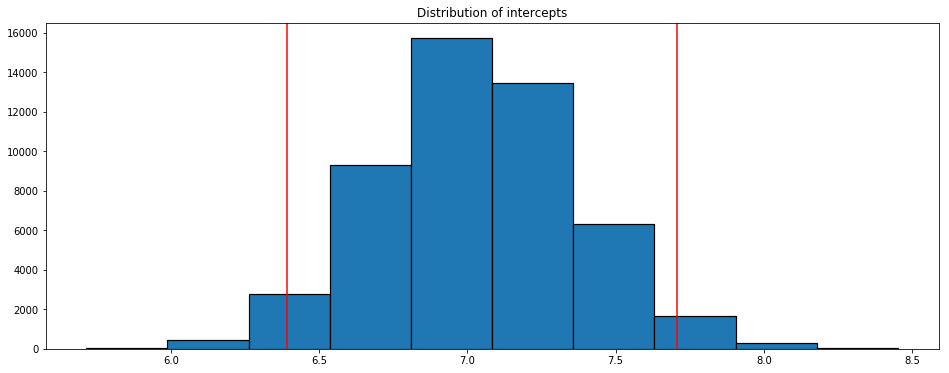

In [215]:
plt.figure(figsize=(16,6))
_ = plt.hist(bootstrap_intercepts,  edgecolor='black', linewidth=1.2)
_ = plt.title("Distribution of intercepts")

con_interval = np.percentile(bootstrap_intercepts, [2.5, 97.5])
print(con_interval)
plt.axvline(con_interval[0], color="red")
plt.axvline(con_interval[1], color="red")


[0.042 0.053]


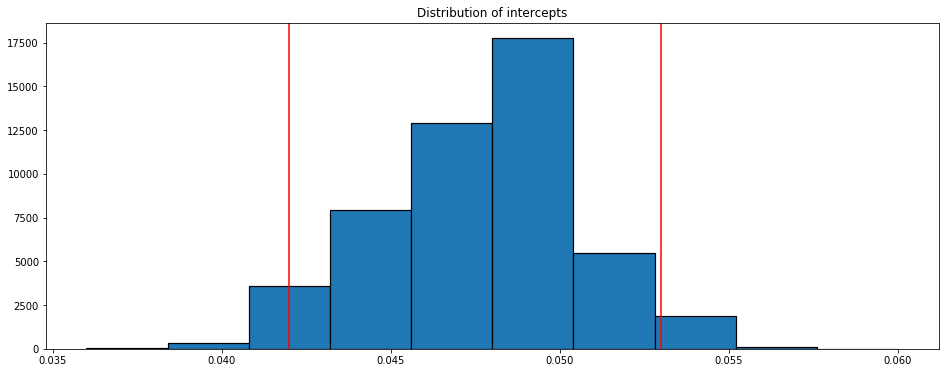

In [216]:
plt.figure(figsize=(16,6))
_ = plt.hist(bootstrap_slopes,  edgecolor='black', linewidth=1.2)
_ = plt.title("Distribution of intercepts")

con_interval = np.percentile(bootstrap_slopes, [2.5, 97.5])
print(con_interval)
plt.axvline(con_interval[0], color="red")
plt.axvline(con_interval[1], color="red")


### Stats Model

* This information can be found using the Statsmodels package
  * We use ordinary least squares model to build the regression model
  
* Used the statistical language  $R$'s to describe the model
  * Here "~" can be interpreted as "a function of" or "depends on"


In [217]:
linregress(advertising["TV"], advertising["sales"])

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703)

In [218]:

est = sm.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


### Interpreting the Simple Linear Regression

* $\beta_0 = 7.03$

* The intercept is the expected mean value of y when x=0
  * If we spend $0 TV advertising, the we should expect, on average,  sales of 7.03 units.  
* The intercept has no intrinsic meaning when x never equals 0
    * Can you think of any examples?
  
$\beta_1 = 0.0475$

*  $\beta_1$ quantifies the association between that variable and the response.
  * The average effect on the reponse (y) of a one unit increase in x
* Each $1,000 spent on TV advertising  is associated with an increase in sales of approximately 47.5 additional units/

### Multiple Linear Regression

* How can we leverarage other information to predict sales 
  * Naive solution: Build independent regresison and combine results.
  
  
* Problems with the naive solution
  * No completetely clear how to combine the data
    * Min or mean, median, etc.? why?
  * Each line ignores the effect of the second
    * Does not account for interactions
    


In [18]:
est = sm.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [19]:
est = sm.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


- Sales versus TV, radio and newspaper advertising budget

### Multiple Linear Regression 

* We re-write our linear regression equation to account for all variables

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon,
$$

* Where:
  * $p$ is the number of params (variables in the model)
  * $\beta_j$ is the mean effect on y for a unit increase in the predictor $x_i$, holding all the other values constant
  

* We an use stats model to compute the parms of the new model:

$$
sales = \beta_0 ~~+~~ \beta_1 \times \text{TV_budget} ~~+~~ \beta_2 \times \text{radio_budget} ~~+~~\beta_3 \times \text{newspaper_budget} ~~+~~ \epsilon,
$$


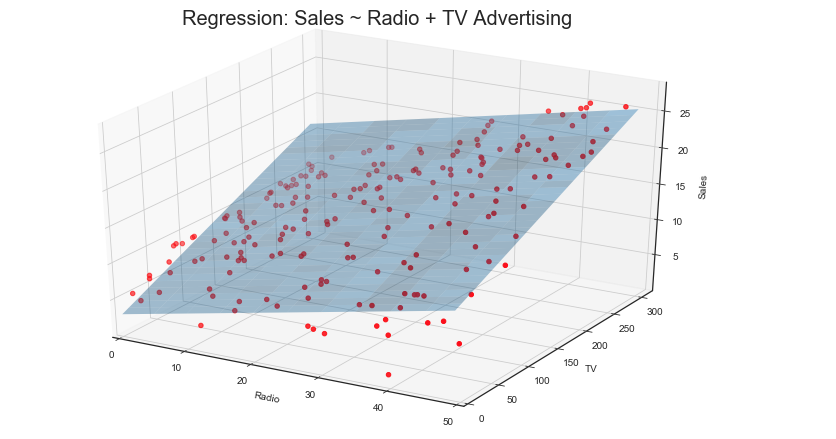

In [220]:
### Estimating the Regression Coefficients

Image("images/plane.png")

In [21]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [20]:
est = sm.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           1.58e-96
Time:                        21:43:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Interpretation

| param | coef    | std err    | t    | P>t |    [0.025    0.975] |
|------|-----------|---|---------|:----------------:|
|Intercept |    2.9389    |0.312    | 9.422    | 0.000    |2.324    |3.554|
|TV    | 0.0458    |0.001    |32.809    |0.000    |0.043    |0.049|
|radio    |0.1885    |0.009    |21.893    |0.000    |0.172    |0.206|
|newspaper    |-0.0010    |0.006    |-0.177    |0.860    |-0.013    |0.011|

* For each additional $1k in TV advertising, we expect, on average, an increase in sales of 45 units

* For each additional $1k in radio advertising, we expect, on average, an increase in sales of 188 units

* The newspaper spending is not significant and does not contribute to the model
    * Why is it different from when tested independently?


### Interaction

* Simple linear regression predicts an effect of 0.0547
* Simple linear regression predicts an effect of ~ 0
* Recall that the  correlation between radio and newspaper is ~0.35
    * Positive correlation indicating that in some cases, spending on radio advertising is accompanied by spending on newspaper  advertising

What is happening?

1. radio advertising leads to increased sales
2. radio and newspaper are correlated
3. we observe that an increase in newspaper advertising increase sales.


### Some Important Concepts to Explore

* In the presence of dozens of predictors, the situation above become intractable manually
  * Which parameters are linked with which other params?

* Including effects that are not there results in  learning "the wrong thing"
  * more on this when we discuss overfitting.
    
* "Identifying the best subset among many variables to include in a model – is arguably the hardest part of model building."
 This is discussed in depth in chapters 3 and of (Introduction to Statistical Learning)
